<a href="https://colab.research.google.com/github/thamyrys-bl/example-geobr/blob/main/Mapas_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Dados OSM de João Pessoa/PB

In [ ]:
#Biliotecas
!apt update -q
!apt upgrade -q #atualizar os pacotes pra ultima versão
!apt install osmnx -q

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [91.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  

In [ ]:
!pip install osmnx -q
!pip install request==2.23.0
!pip install folium==0.2.1
!pip install impaug==0.2.5
!pip install matplotlib==3.1.3

     |████████████████████████████████| 95 kB 2.7 MB/s 
     |████████████████████████████████| 11.2 MB 32.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 34.8 MB/s 
     |████████████████████████████████| 6.3 MB 27.7 MB/s 
     |████████████████████████████████| 1.0 MB 52.6 MB/s 
     |████████████████████████████████| 16.7 MB 35.6 MB/s 
     |████████████████████████████████| 957 kB 42.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement request==2.23.0 (from versions: none)
ERROR: No matching distribution found for request==2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=c158e3b7ff4361465f1b56716e2b13efb7bc8edc

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

lugar="João Pessoa"


In [ ]:
rede= ox.graph_from_place(lugar)

In [ ]:
type(rede)

networkx.classes.multidigraph.MultiDiGraph

In [ ]:
fig,ax=ox.plot_graph(rede)

In [ ]:
area= ox.geocode_to_gdf(lugar)
print(type(area))

In [ ]:
area.plot()

In [ ]:
#Vamos agora extrair os predios da região da Paraíba

predios= ox.geometries_from_place(lugar, tags={'building': True})

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


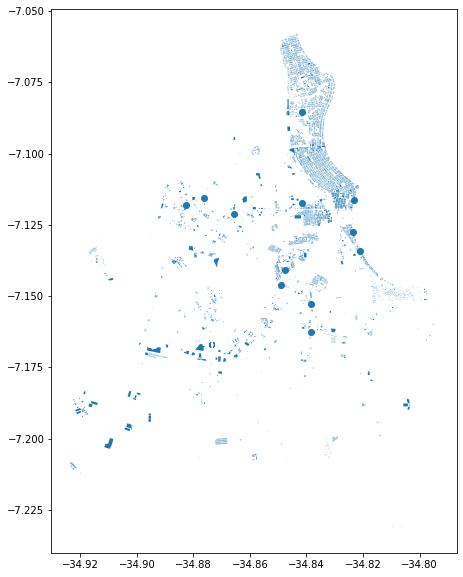

In [ ]:
predios.plot(figsize=(10,10))

In [ ]:
predios.head()

shop                    geometry addr:housenumber  \
element_type osmid                                                          
node         1696114194  NaN  POINT (-34.87613 -7.11553)              182   
             2537415384  NaN  POINT (-34.88256 -7.11789)               64   
             2660262994  NaN  POINT (-34.86554 -7.12127)              NaN   
             2928661443  NaN  POINT (-34.82347 -7.12755)             1984   
             3824855718  NaN  POINT (-34.82316 -7.11641)              NaN   

                                             addr:street    building  \
element_type osmid                                                     
node         1696114194  Avenida Monsenhor Walfredo Leal      public   
             2537415384               Rua Barão do Abiaí         yes   
             2660262994                              NaN  commercial   
             2928661443              Avenida Cabo Branco       hotel   
             3824855718                              NaN       hotel   

                                                                      name  \
element_type osmid                                                           
node         1696114194  Superintendência de Administração do Meio Ambi...   
             2537415384  IHGP - Instituto Histórico e Geográfico Paraibano   
             2660262994                                   Máximum Shopping   
             2928661443                                  Igatu Praia Hotel   
             3824855718                                                NaN   

                        short_name  amenity addr:postcode    contact:phone  \
element_type osmid                                                           
node         1696114194     SUDEMA      NaN           NaN              NaN   
             2537415384        NaN  library     58013-080  +55 83 32220513   
             2660262994        NaN      NaN           NaN              NaN   
             2928661443        NaN      NaN     58045-010              NaN   
             3824855718        NaN      NaN           NaN              NaN   

                         ... min_age email roof:levels access ways type  \
element_type osmid       ...                                              
node         1696114194  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             2537415384  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             2660262994  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             2928661443  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             3824855718  ...     NaN   NaN         NaN    NaN  NaN  NaN   

                        seamark:building:function seamark:landmark:function  \
element_type osmid                                                            
node         1696114194                       NaN                       NaN   
             2537415384                       NaN                       NaN   
             2660262994                       NaN                       NaN   
             2928661443                       NaN                       NaN   
             3824855718                       NaN                       NaN   

                        books castle_type  
element_type osmid                         
node         1696114194   NaN         NaN  
             2537415384   NaN         NaN  
             2660262994   NaN         NaN  
             2928661443   NaN         NaN  
             3824855718   NaN         NaN  

[5 rows x 157 columns]

In [ ]:
import pandas as pd

pd.unique(predios.building)

array(['public', 'yes', 'commercial', 'hotel', 'church', 'apartments',
       'stadium', 'office', 'hospital', 'school', 'supermarket',
       'transportation', 'service', 'bunker', 'retail', 'university',
       'house', 'warehouse', 'detached', 'roof', 'shop', 'residential',
       'hangar', 'basilica', 'chapel', 'train_station', 'college',
       'parking', 'garage', 'industrial', 'construction', 'ruins',
       'carport', 'dormitory'], dtype=object)

In [ ]:
predios.columns

Index(['shop', 'geometry', 'addr:housenumber', 'addr:street', 'building',
       'name', 'short_name', 'amenity', 'addr:postcode', 'contact:phone',
       ...
       'min_age', 'email', 'roof:levels', 'access', 'ways', 'type',
       'seamark:building:function', 'seamark:landmark:function', 'books',
       'castle_type'],
      dtype='object', length=157)

In [ ]:
nos,arestas = ox.graph_to_gdfs(rede)

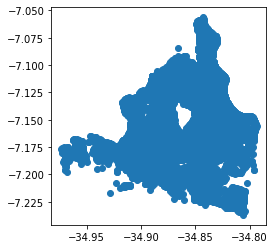

In [ ]:
nos.plot()

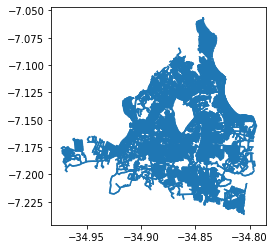

In [ ]:
arestas.plot()

In [ ]:
nos.head()

,y,x,street_count,highway,geometry
osmid,,,,,
324817308,-7.160615,-34.905160,3,NaN,POINT (-34.90516 -7.16061)
324817350,-7.126232,-34.845368,3,NaN,POINT (-34.84537 -7.12623)
337591192,-7.110482,-34.853621,4,NaN,POINT (-34.85362 -7.11048)
337591196,-7.111916,-34.853400,4,NaN,POINT (-34.85340 -7.11192)
337592894,-7.110491,-34.855735,3,NaN,POINT (-34.85573 -7.11049)


In [ ]:
arestas.head()

osmid  oneway lanes  \
u         v          key                                                    
324817308 3552602031 0                            246441628    True     2   
          3552601996 0                            356319614   False   NaN   
324817350 2052120227 0                            194708197    True   NaN   
          1869474390 0    [258947443, 298237813, 300146671]    True     2   
337591192 818939265  0                             46916402   False   NaN   

                                    ref                                name  \
u         v          key                                                      
324817308 3552602031 0    BR-101;BR-230      Rodovia Governador Mário Covas   
          3552601996 0              NaN                      Rua Domésticas   
324817350 2052120227 0              NaN                                 NaN   
          1869474390 0    BR-230;PB-008    Rodovia Governador Antônio Mariz   
337591192 818939265  0              NaN  Rua Lionídio Francisco de Oliveira   

                              highway   length  \
u         v          key                         
324817308 3552602031 0          trunk  332.974   
          3552601996 0    residential  286.709   
324817350 2052120227 0     trunk_link  234.042   
          1869474390 0          trunk  947.851   
337591192 818939265  0    residential   67.418   

                                                                   geometry  \
u         v          key                                                      
324817308 3552602031 0    LINESTRING (-34.90516 -7.16061, -34.90502 -7.1...   
          3552601996 0    LINESTRING (-34.90516 -7.16061, -34.90513 -7.1...   
324817350 2052120227 0    LINESTRING (-34.84537 -7.12623, -34.84531 -7.1...   
          1869474390 0    LINESTRING (-34.84537 -7.12623, -34.84530 -7.1...   
337591192 818939265  0    LINESTRING (-34.85362 -7.11048, -34.85375 -7.1...   

                          maxspeed bridge junction access service width tunnel  
u         v          key                                                        
324817308 3552602031 0         NaN    NaN      NaN    NaN     NaN   NaN    NaN  
          3552601996 0         NaN    NaN      NaN    NaN     NaN   NaN    NaN  
324817350 2052120227 0         NaN    NaN      NaN    NaN     NaN   NaN    NaN  
          1869474390 0    [50, 60]    NaN      NaN    NaN     NaN   NaN    NaN  
337591192 818939265  0         NaN    NaN      NaN    NaN     NaN   NaN    NaN

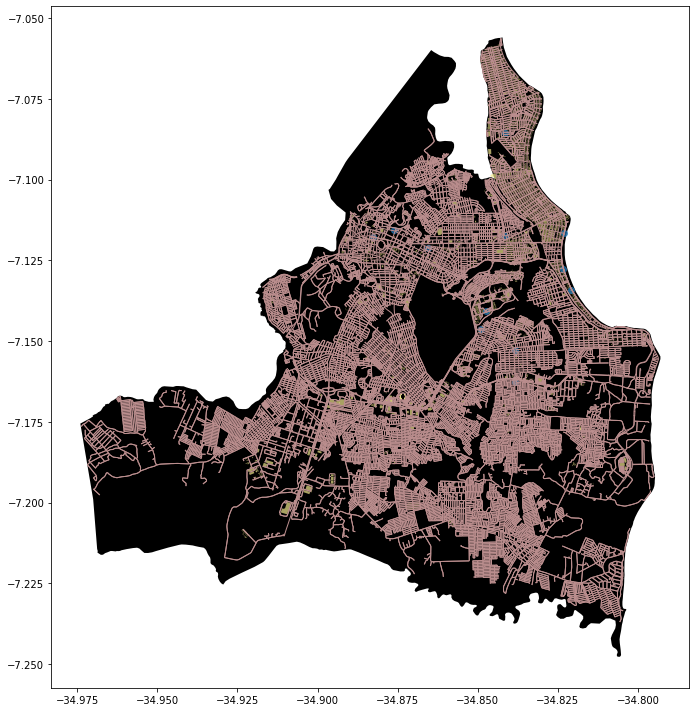

In [ ]:
fig,eixo=plt.subplots(figsize=(10,10))

area.plot(ax=eixo, facecolor='black')
arestas.plot(ax=eixo, linewidth=1, edgecolor='#BC8F8F')
predios.plot(ax=eixo, facecolor='khaki', alpha=0.7)
plt.tight_layout()


In [ ]:
type(predios)

geopandas.geodataframe.GeoDataFrame

In [ ]:
predios.head()

shop                    geometry addr:housenumber  \
element_type osmid                                                          
node         1696114194  NaN  POINT (-34.87613 -7.11553)              182   
             2537415384  NaN  POINT (-34.88256 -7.11789)               64   
             2660262994  NaN  POINT (-34.86554 -7.12127)              NaN   
             2928661443  NaN  POINT (-34.82347 -7.12755)             1984   
             3824855718  NaN  POINT (-34.82316 -7.11641)              NaN   

                                             addr:street    building  \
element_type osmid                                                     
node         1696114194  Avenida Monsenhor Walfredo Leal      public   
             2537415384               Rua Barão do Abiaí         yes   
             2660262994                              NaN  commercial   
             2928661443              Avenida Cabo Branco       hotel   
             3824855718                              NaN       hotel   

                                                                      name  \
element_type osmid                                                           
node         1696114194  Superintendência de Administração do Meio Ambi...   
             2537415384  IHGP - Instituto Histórico e Geográfico Paraibano   
             2660262994                                   Máximum Shopping   
             2928661443                                  Igatu Praia Hotel   
             3824855718                                                NaN   

                        short_name  amenity addr:postcode    contact:phone  \
element_type osmid                                                           
node         1696114194     SUDEMA      NaN           NaN              NaN   
             2537415384        NaN  library     58013-080  +55 83 32220513   
             2660262994        NaN      NaN           NaN              NaN   
             2928661443        NaN      NaN     58045-010              NaN   
             3824855718        NaN      NaN           NaN              NaN   

                         ... min_age email roof:levels access ways type  \
element_type osmid       ...                                              
node         1696114194  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             2537415384  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             2660262994  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             2928661443  ...     NaN   NaN         NaN    NaN  NaN  NaN   
             3824855718  ...     NaN   NaN         NaN    NaN  NaN  NaN   

                        seamark:building:function seamark:landmark:function  \
element_type osmid                                                            
node         1696114194                       NaN                       NaN   
             2537415384                       NaN                       NaN   
             2660262994                       NaN                       NaN   
             2928661443                       NaN                       NaN   
             3824855718                       NaN                       NaN   

                        books castle_type  
element_type osmid                         
node         1696114194   NaN         NaN  
             2537415384   NaN         NaN  
             2660262994   NaN         NaN  
             2928661443   NaN         NaN  
             3824855718   NaN         NaN  

[5 rows x 157 columns]

In [ ]:
predios.shape

(14521, 157)

In [ ]:
predios_sub=predios[['geometry', 'building']]

In [ ]:
predios_sub.head()

geometry    building
element_type osmid                                             
node         1696114194  POINT (-34.87613 -7.11553)      public
             2537415384  POINT (-34.88256 -7.11789)         yes
             2660262994  POINT (-34.86554 -7.12127)  commercial
             2928661443  POINT (-34.82347 -7.12755)       hotel
             3824855718  POINT (-34.82316 -7.11641)       hotel

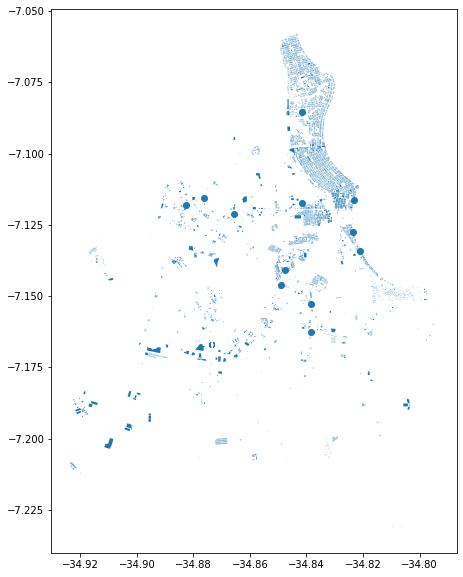

In [ ]:
predios_sub.plot(figsize=(10,10))